# **Image Thresholding**

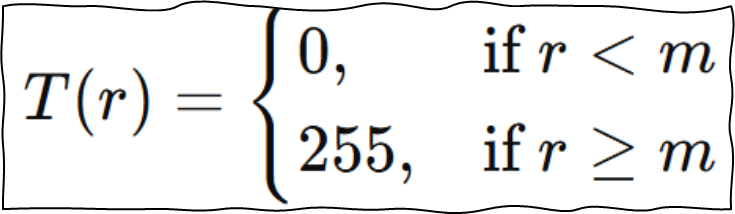

**binary_image.astype('uint8'):**

The binary image after thresholding contains pixel values of 0 or 255 (binary format).

These pixel values are often stored as a NumPy array of type bool (True for 255 and False for 0) or as a numeric type.

The astype('uint8') converts the binary image to an 8-bit unsigned integer format, which is the standard image type for OpenCV to display images.

Original Image:


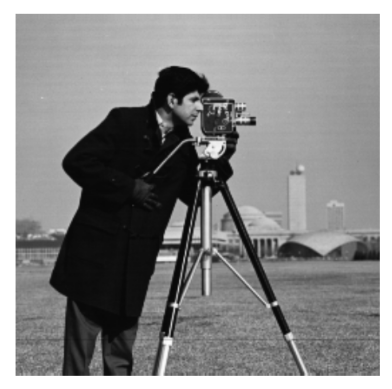

Binary Image after Thresholding:


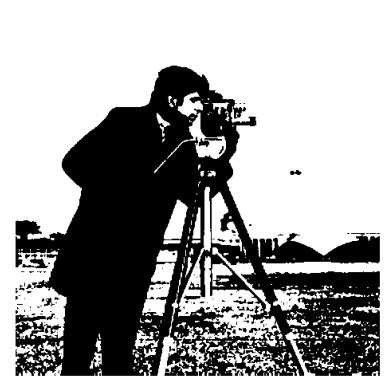

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('thr.png')  # Load as grayscale

# Display the original image
print("Original Image:")
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

# Define the threshold value
threshold = 128

# Apply thresholding
binary_image = (image > threshold) * 255  # Convert to binary (0 or 255)

# Display the binary image
print("Binary Image after Thresholding:")
plt.imshow(binary_image.astype('uint8'))
plt.axis('off')  # Hide the axis
plt.show()

# **Negative Image**

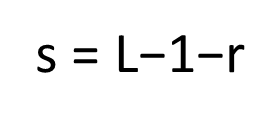

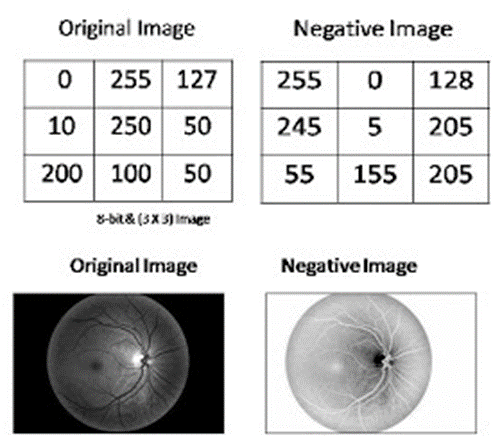

Original Image:


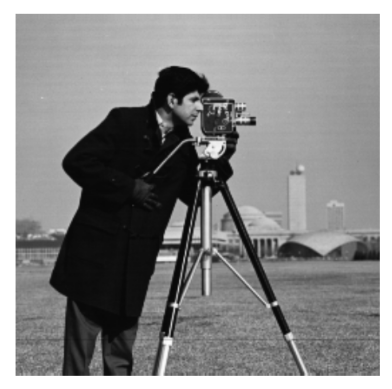

Negative Image:


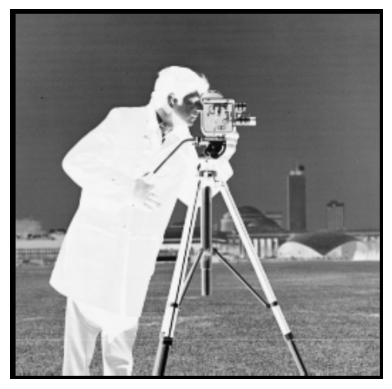

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('thr.png')

# Apply the negative transformation
L = 256  # Maximum intensity level for an 8-bit image
negative_image = L - 1 - image

# Display the original image
print("Original Image:")
plt.imshow(image)
plt.axis('off')
plt.show()

# Display the negative image
print("Negative Image:")
plt.imshow(negative_image)
plt.axis('off')
plt.show()

# **Log Transformation**

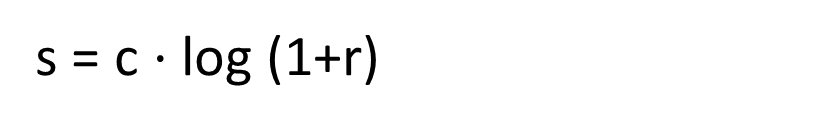

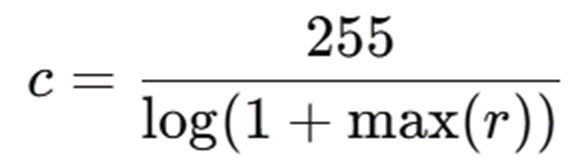

Original Image:


<ipython-input-6-365d35a5761f>:12: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * np.log(1 + image)


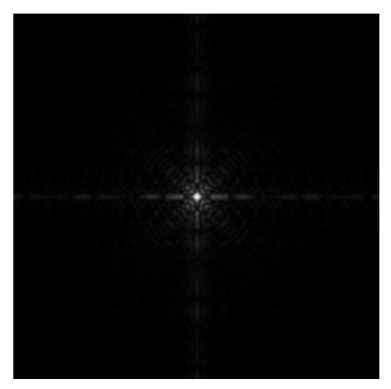

Log Transformed Image:


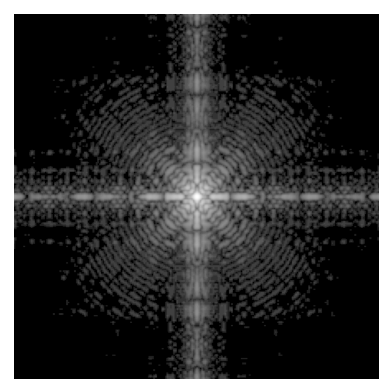

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('log.png', 0)  # Load as grayscale

# Define the scaling constant (c)
c = 255 / np.log(1 + np.max(image))

# Apply the log transformation
log_transformed_image = c * np.log(1 + image)

# Display the original image
print("Original Image:")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Display the log-transformed image
print("Log Transformed Image:")
plt.imshow(log_transformed_image, cmap='gray')
plt.axis('off')
plt.show()

# **Inverse Log Transformation**

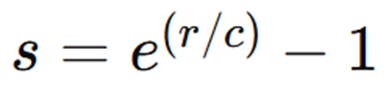

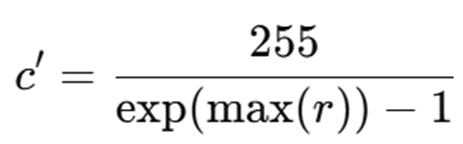

Original Image:


<ipython-input-7-fb0aeeeb4606>:9: RuntimeWarning: overflow encountered in exp
  c_prime = 255 / (np.exp(np.max(image)) - 1)
<ipython-input-7-fb0aeeeb4606>:12: RuntimeWarning: overflow encountered in exp
  inverse_log_transformed_image = c_prime * (np.exp(image) - 1)
<ipython-input-7-fb0aeeeb4606>:12: RuntimeWarning: invalid value encountered in multiply
  inverse_log_transformed_image = c_prime * (np.exp(image) - 1)


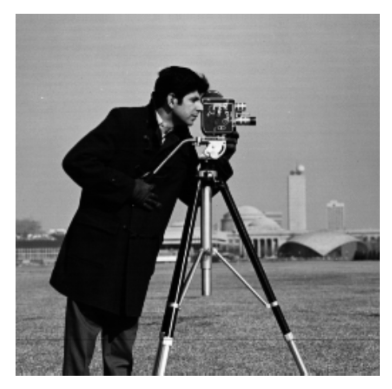

Inverse Log Transformed Image:


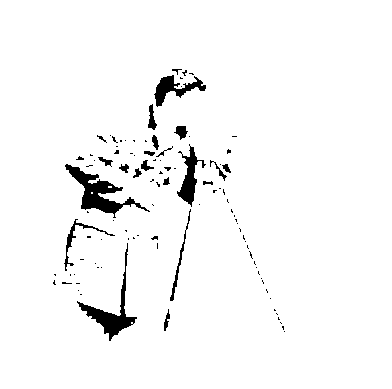

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('thr.png', 0)  # Load as grayscale

# Define the scaling constant c' for inverse log transformation
c_prime = 255 / (np.exp(np.max(image)) - 1)

# Apply the inverse log transformation
inverse_log_transformed_image = c_prime * (np.exp(image) - 1)

# Display the original image
print("Original Image:")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Display the inverse log-transformed image
print("Inverse Log Transformed Image:")
plt.imshow(inverse_log_transformed_image, cmap='gray')
plt.axis('off')
plt.show()

# **Power Law Transformation**

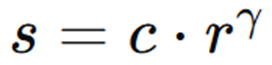

Original Image:


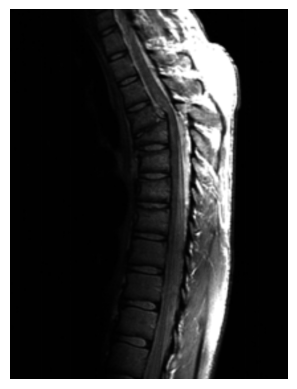

Gamma Transformed Image (gamma = 0.5):


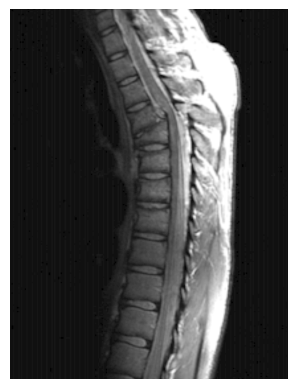

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('mr.png', 0)  # Load as grayscale

# Define the gamma value (e.g., 0.5 for darkening, 2.0 for lightening)
gamma = 0.5

# Calculate the scaling constant c
c = 255 / (np.max(image) ** gamma)

# Apply the power-law (gamma) transformation
gamma_transformed_image = c * (image ** gamma)

# Display the original image
print("Original Image:")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Display the gamma-transformed image
print(f"Gamma Transformed Image (gamma = {gamma}):")
plt.imshow(gamma_transformed_image, cmap='gray')
plt.axis('off')
plt.show()

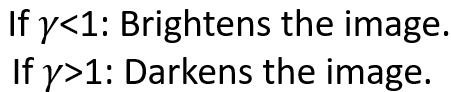

# **n-th Root Transformation**

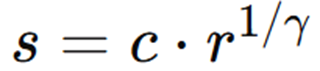

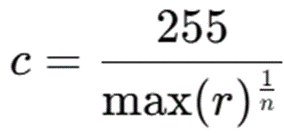

Original Image:


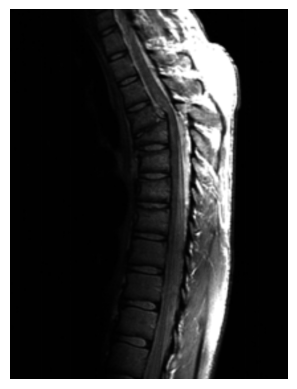

nth Root Transformed Image (n = 2):


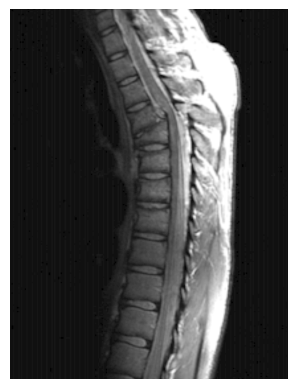

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('mr.png', 0)  # Load as grayscale

# Define the nth root value (e.g., 2 for square root, 3 for cube root)
n = 2

# Calculate the scaling constant c
c = 255 / (np.max(image) ** (1 / n))

# Apply the nth root transformation
nth_root_transformed_image = c * (image ** (1 / n))

# Display the original image
print("Original Image:")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Display the nth root transformed image
print(f"nth Root Transformed Image (n = {n}):")
plt.imshow(nth_root_transformed_image, cmap='gray')
plt.axis('off')
plt.show()

# **Contrast Stretching**

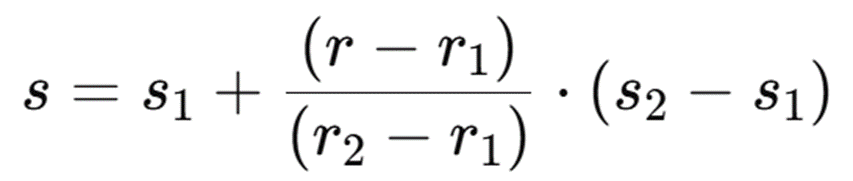

lambda allows us to write the transformation in a single line without creating a separate function with def.

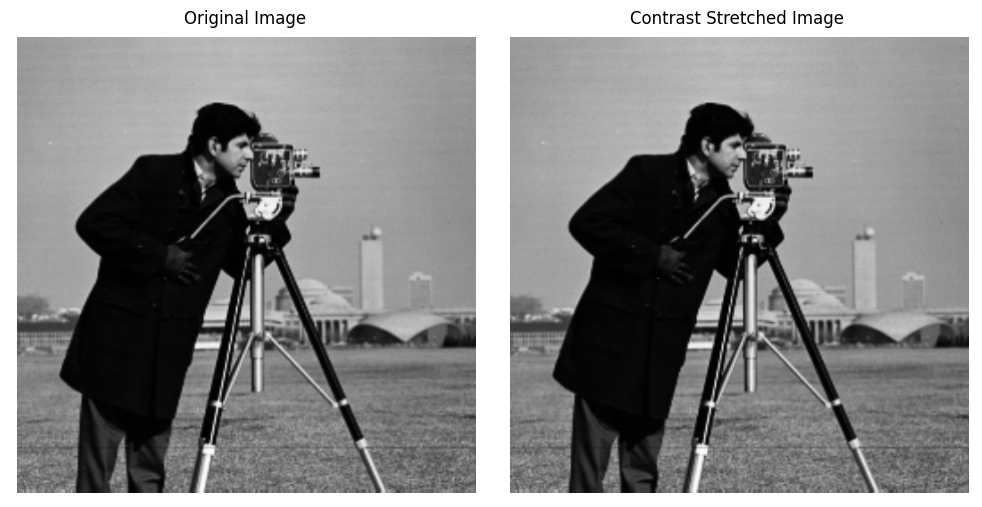

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching_transformation(image, s_min=0, s_max=255):
    """
    Apply contrast stretching using a transformation function.

    Parameters:
        image: Input grayscale image (numpy array).
        s_min: Minimum value of the output range (default: 0).
        s_max: Maximum value of the output range (default: 255).

    Returns:
        Stretched image (numpy array).
    """
    # Find the minimum and maximum pixel values in the input image
    r_min = np.min(image)
    r_max = np.max(image)

    # Define the transformation function
    T = lambda r: ((r - r_min) / (r_max - r_min)) * (s_max - s_min) + s_min

    # Apply the transformation to the entire image
    stretched_image = T(image)

    # Clip values to the range [s_min, s_max]
    return np.uint8(np.clip(stretched_image, s_min, s_max))

    """
    This operation ensures that all pixel values in the stretched_image are within the range [s_min, s_max].
    """

# Load the grayscale image
image = cv2.imread('thr.png', 0)  # Replace 'image.png' with your image file

# Apply contrast stretching
stretched_image = contrast_stretching_transformation(image)

# Display the original and transformed images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Stretched Image
plt.subplot(1, 2, 2)
plt.title("Contrast Stretched Image")
plt.imshow(stretched_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Gray Level Slicing**

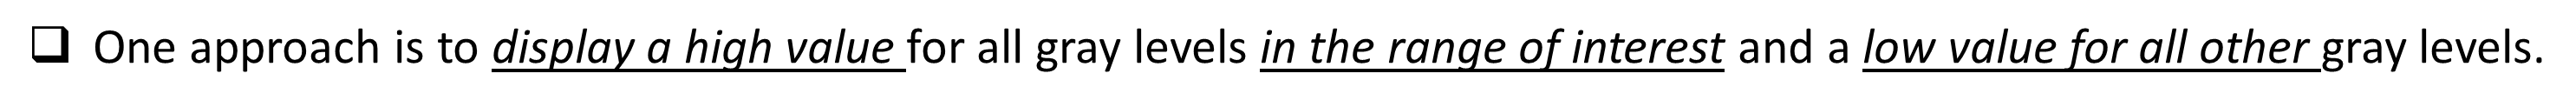

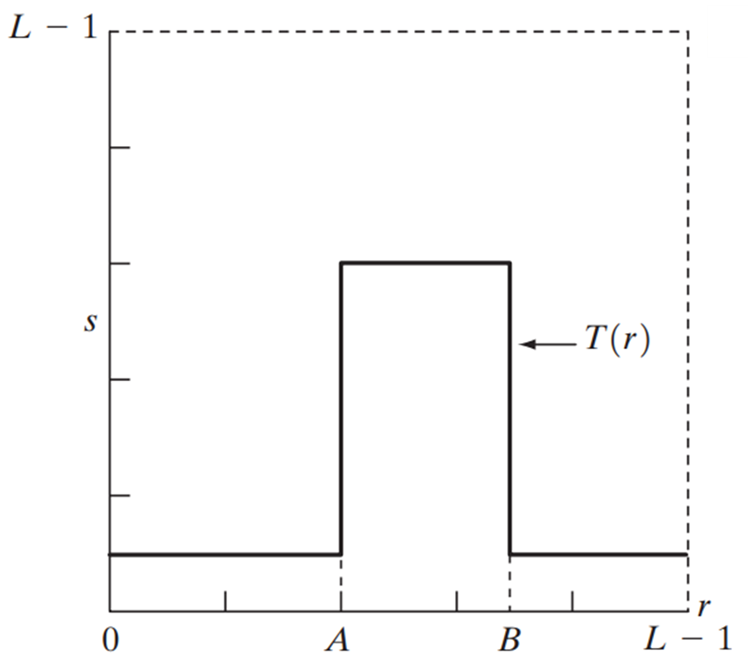

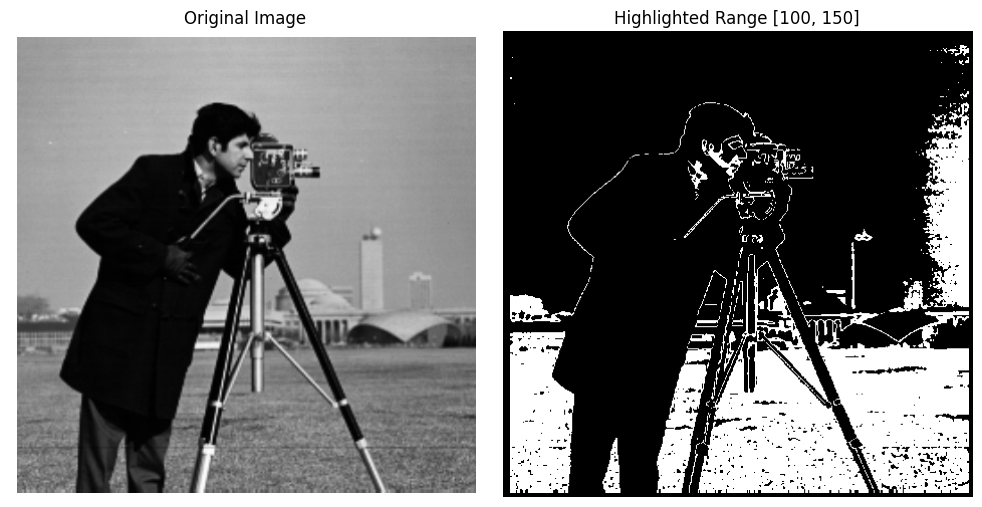

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_range(image, r_low, r_high):
    """
    Highlights a specific range of gray levels in an image.

    Parameters:
        image: Input grayscale image (numpy array).
        r_low: Lower bound of the gray level range.
        r_high: Upper bound of the gray level range.

    Returns:
        Highlighted image (numpy array).
    """
    # Create a mask for the range
    mask = (image >= r_low) & (image <= r_high) # create a binary mask that identifies which pixels in the image lie within a specified range of intensity values.

    # Highlight the range: set pixels in the range to 255, others to 0
    highlighted_image = np.zeros_like(image)
    highlighted_image[mask] = 255

    return highlighted_image

# Load the grayscale image
image = cv2.imread('thr.png', 0)  # Replace 'image.png' with your image file

# Define the range of gray levels to highlight
r_low = 100
r_high = 150

# Apply the highlighting transformation
highlighted_image = highlight_range(image, r_low, r_high)

# Display the original and highlighted images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Highlighted Image
plt.subplot(1, 2, 2)
plt.title(f"Highlighted Range [{r_low}, {r_high}]")
plt.imshow(highlighted_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

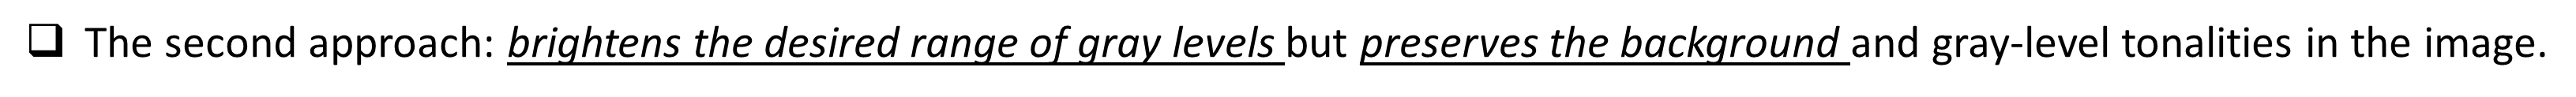

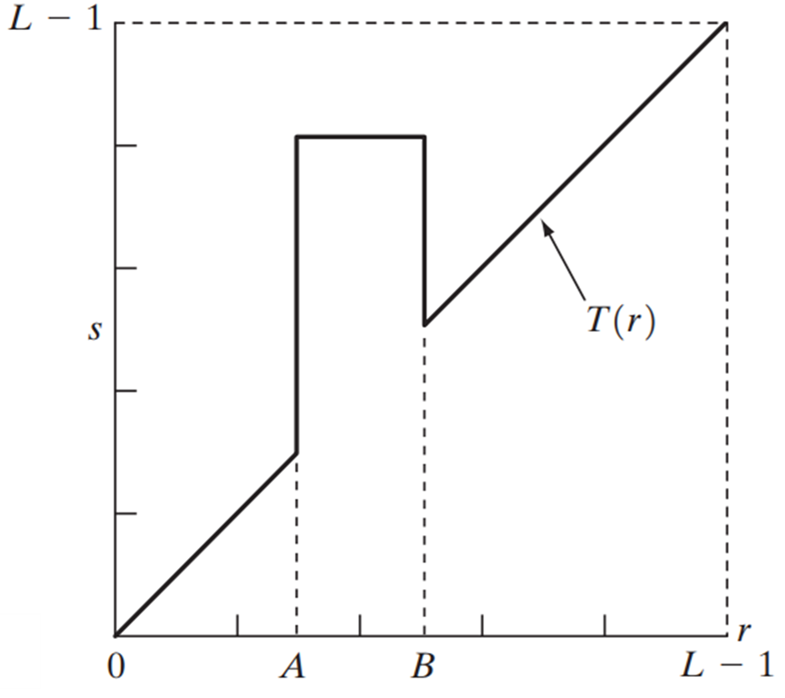

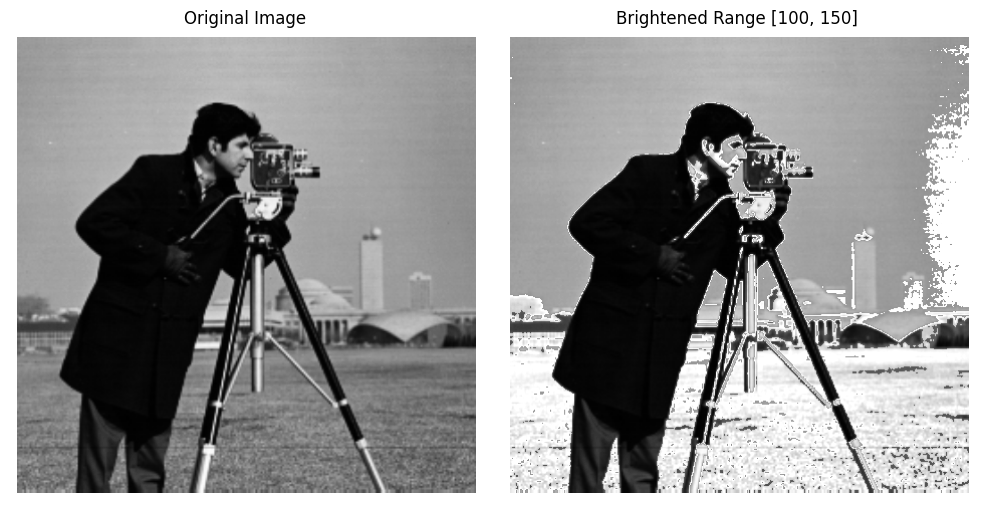

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def brighten_range(image, r_low, r_high, scale_factor=1.5, add_constant=50):
    """
    Brightens a specific range of gray levels while preserving background tonalities.

    Parameters:
        image: Input grayscale image (numpy array).
        r_low: Lower bound of the gray level range to brighten.
        r_high: Upper bound of the gray level range to brighten.
        scale_factor: Factor to scale the intensities in the range (default: 1.5).
        add_constant: Constant to add to intensities in the range (default: 50).

    Returns:
        Brightened image (numpy array).
    """
    # Copy the image to avoid modifying the original
    brightened_image = image.copy()

    # Brighten the desired range
    mask = (image >= r_low) & (image <= r_high)
    brightened_image[mask] = np.clip(image[mask] * scale_factor + add_constant, 0, 255)

    return brightened_image

# Load the grayscale image
image = cv2.imread('thr.png', 0)  # Replace 'image.png' with your image file

# Define the range of gray levels to brighten
r_low = 100
r_high = 150

# Apply the brightening transformation
brightened_image = brighten_range(image, r_low, r_high)

# Display the original and brightened images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Brightened Image
plt.subplot(1, 2, 2)
plt.title(f"Brightened Range [{r_low}, {r_high}]")
plt.imshow(brightened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Bit Plane Slicing**

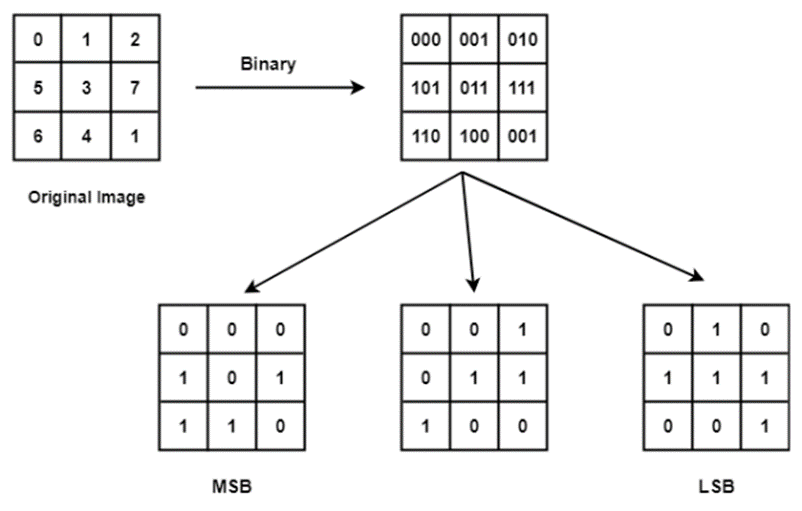

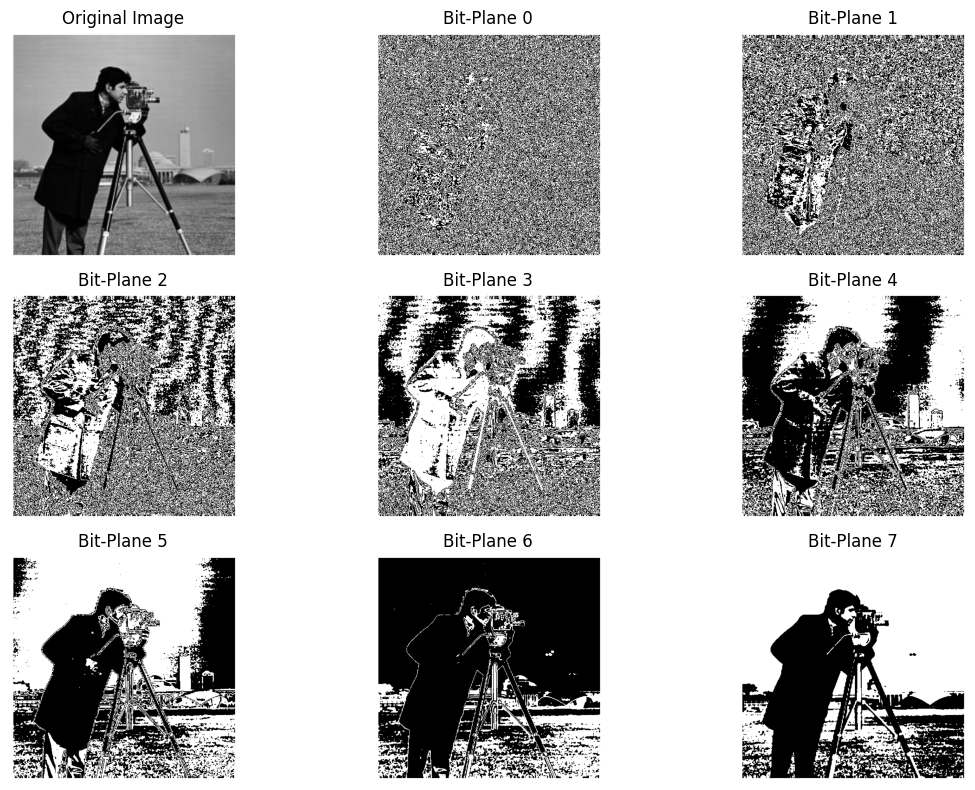

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bit_plane_slicing(image):
    """
    Performs bit-plane slicing on an 8-bit grayscale image.

    Parameters:
        image: Input grayscale image (numpy array).

    Returns:
        A list of bit-plane images (numpy arrays).
    """
    bit_planes = []
    for i in range(8): # # Loop through each of the 8 bits (for an 8-bit image)
        # Extract the i-th bit plane using bitwise AND and shifting
        bit_plane = (image & (1 << i)) >> i
        # Scale to 0-255 for visualization (make it binary: 0 or 255)
        bit_planes.append(bit_plane * 255)
    return bit_planes

# Load the grayscale image
image = cv2.imread('thr.png', 0)  # Replace 'image.png' with your file

# Perform bit-plane slicing
bit_planes = bit_plane_slicing(image)

# Display the original image and its bit planes
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Bit Planes
for i in range(8):
    plt.subplot(3, 3, i + 2) # Create a 3x3 grid for subplots (placing bit-planes starting from the second slot)
    plt.title(f"Bit-Plane {i}") #  Add a title indicating the bit-plane index
    plt.imshow(bit_planes[i], cmap='gray') #  Show the i-th bit-plane with a grayscale colormap
    plt.axis('off')

plt.tight_layout()
plt.show()